In [1]:
%matplotlib inline
import pandas as pd

In [4]:
sephora_df=pd.read_csv('product_info.csv')

In [ ]:
sephora_df.head(5)

## Visión general del dataset

In [6]:
sephora_df.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')

In [7]:
sephora_df.dtypes

product_id             object
product_name           object
brand_id                int64
brand_name             object
loves_count             int64
rating                float64
reviews               float64
size                   object
variation_type         object
variation_value        object
variation_desc         object
ingredients            object
price_usd             float64
value_price_usd       float64
sale_price_usd        float64
limited_edition         int64
new                     int64
online_only             int64
out_of_stock            int64
sephora_exclusive       int64
highlights             object
primary_category       object
secondary_category     object
tertiary_category      object
child_count             int64
child_max_price       float64
child_min_price       float64
dtype: object

In [8]:
sephora_df.describe()

,brand_id,loves_count,rating,reviews,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,child_count,child_max_price,child_min_price
count,8494.000000,8.494000e+03,8216.000000,8216.000000,8494.000000,451.000000,270.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,2754.000000,2754.000000
mean,5422.440546,2.917957e+04,4.194513,448.545521,51.655595,91.168537,20.207889,0.070285,0.071698,0.219096,0.073699,0.279374,1.631622,53.792023,39.665802
std,1709.595957,6.609212e+04,0.516694,1101.982529,53.669234,79.195631,24.327352,0.255642,0.258002,0.413658,0.261296,0.448718,5.379470,58.765894,38.685720
min,1063.000000,0.000000e+00,1.000000,1.000000,3.000000,0.000000,1.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
25%,5333.000000,3.758000e+03,3.981725,26.000000,25.000000,45.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,19.000000
50%,6157.500000,9.880000e+03,4.289350,122.000000,35.000000,67.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,28.000000
75%,6328.000000,2.684125e+04,4.530525,418.000000,58.000000,108.500000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,59.000000,42.000000
max,8020.000000,1.401068e+06,5.000000,21281.000000,1900.000000,617.000000,320.000000,1.000000,1.000000,1.000000,1.000000,1.000000,105.000000,570.000000,400.000000


In [ ]:
sephora_df = sephora_df[['product_id', 'product_name', 'brand_id', 'loves_count', 'rating', 'reviews','price_usd','sale_price_usd','limited_edition','new','online_only','out_of_stock','highlights', 'primary_category','secondary_category', 'tertiary_category']]

In [11]:
sephora_df['rating'].value_counts()

5.0000    256
4.0000    174
4.5000     82
4.3333     68
3.0000     66
         ... 
4.6954      1
4.2841      1
4.3613      1
4.6878      1
4.6367      1
Name: rating, Length: 4394, dtype: int64

In [12]:
len(sephora_df['reviews'].unique())

1557

In [15]:
sephora_df['loves_count'].value_counts()[0:10]

0        91
22        5
4679      5
1039      4
3226      4
840       4
999       4
19428     4
1333      4
3602      4
Name: loves_count, dtype: int64

<AxesSubplot:>

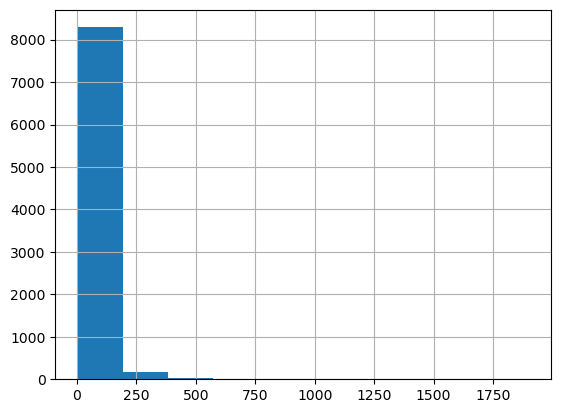

In [18]:
sephora_df['price_usd'].hist()

<AxesSubplot:>

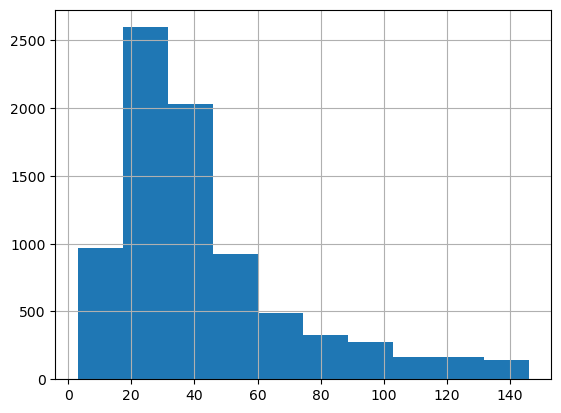

In [19]:
sephora_df[sephora_df['price_usd']< sephora_df['price_usd'].quantile(0.95)]['price_usd'].hist()

<AxesSubplot:>

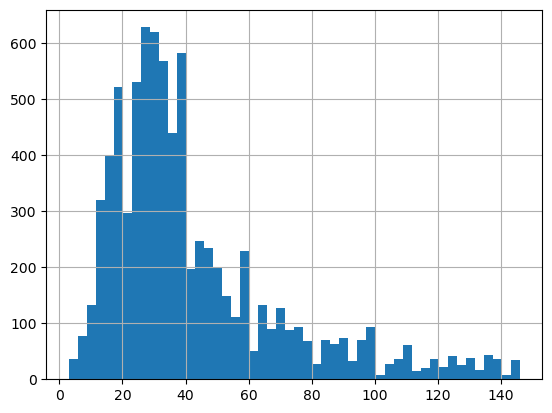

In [20]:
sephora_df[sephora_df['price_usd']< sephora_df['price_usd'].quantile(0.95)]['price_usd'].hist(bins=50)

In [21]:
sephora_df[sephora_df['price_usd']< sephora_df['price_usd'].quantile(0.95)].head(5)

,product_id,product_name,brand_id,loves_count,rating,reviews,price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,highlights,primary_category,secondary_category,tertiary_category
0,P473671,Fragrance Discovery Set,6342,6320,3.6364,11.0,35.0,NaN,0,0,1,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets
5,P473661,Kasbah Eau de Parfum Travel Spray,6342,2448,4.4762,21.0,30.0,NaN,0,0,1,0,"['Warm &Spicy Scent', 'Unisex/ Genderless Scen...",Fragrance,Women,Rollerballs & Travel Size
6,P473659,Purple Haze Eau de Parfum Travel Spray,6342,1619,3.2308,13.0,30.0,NaN,0,0,1,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Rollerballs & Travel Size
9,P473667,Invisible Post Eau de Parfum Travel Spray,6342,1377,3.6250,8.0,30.0,NaN,0,0,1,0,"['Unisex/ Genderless Scent', 'allure 2022 Best...",Fragrance,Women,Rollerballs & Travel Size
10,P473663,Rainbow Bar Eau de Parfum Travel Spray,6342,1371,4.2500,16.0,30.0,NaN,0,0,1,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Rollerballs & Travel Size


## Análisis multidimensional de las variables 

In [22]:
sum_product_name_loves_count= sephora_df.groupby('product_name').sum()['loves_count']

<AxesSubplot:xlabel='product_name'>

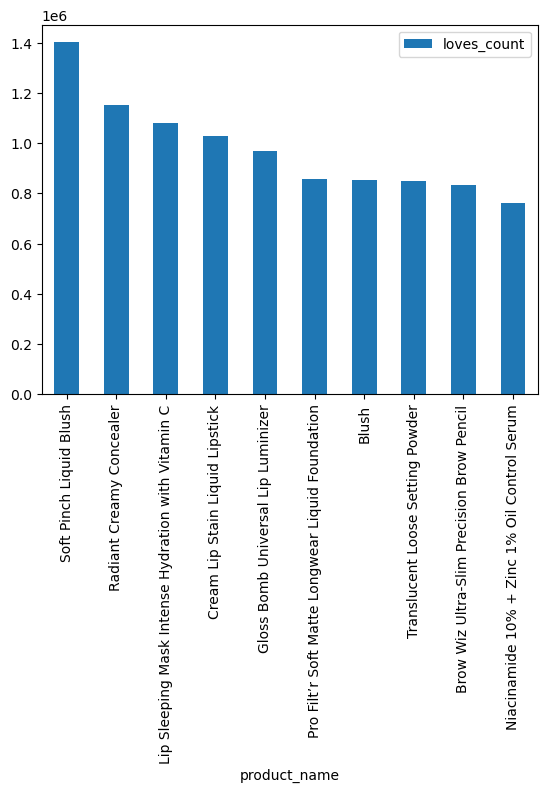

In [24]:
sum_product_name_loves_count.reset_index().sort_values(by='loves_count', ascending=False).iloc[0:10].plot(kind='bar', x='product_name', y='loves_count')

In [29]:
sum_highlights_rating = sephora_df.groupby('highlights').sum()['rating']

<AxesSubplot:xlabel='highlights'>

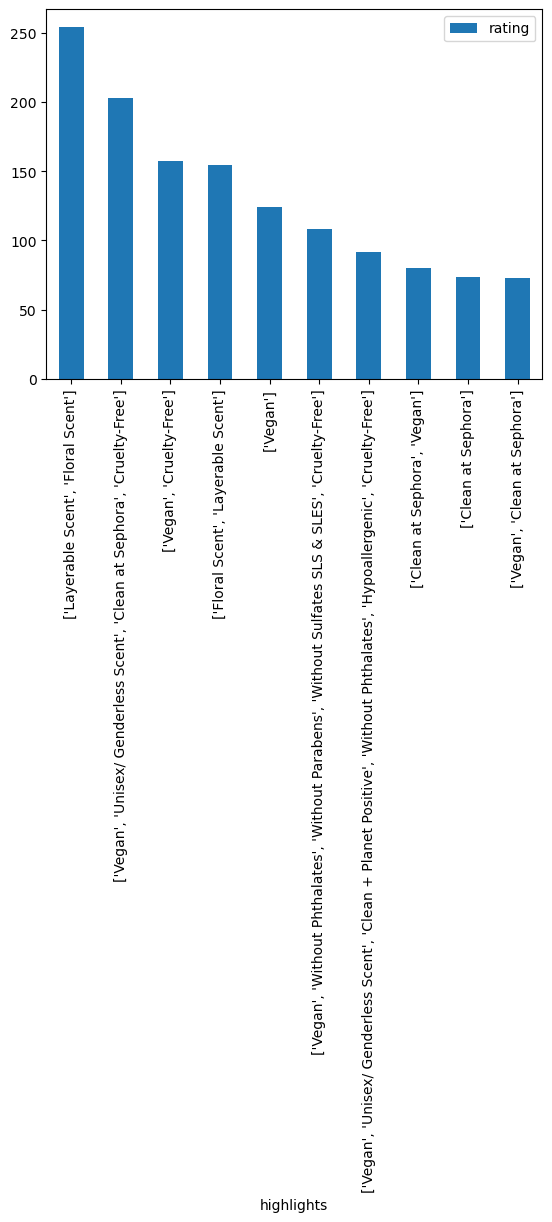

In [30]:
sum_highlights_rating.reset_index().sort_values(by='rating', ascending=False).iloc[0:10].plot(kind='bar', x='highlights', y='rating')

In [32]:
mean_loves_count_highlights = sephora_df.groupby('highlights').mean()['loves_count']

<AxesSubplot:xlabel='highlights'>

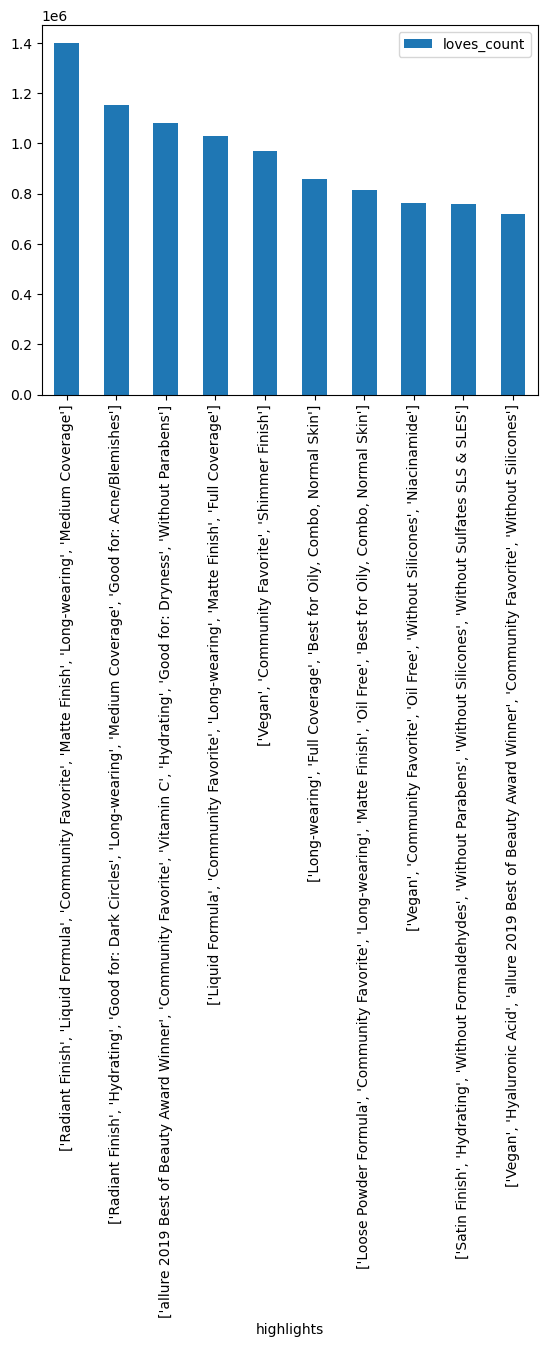

In [33]:
mean_loves_count_highlights.reset_index().sort_values(by='loves_count', ascending=False).iloc[0:10].plot(kind='bar', x='highlights', y='loves_count')

In [34]:

mean_loves_count_highlights.reset_index().sort_values(by='loves_count', ascending=False).iloc[0:10]

,highlights,loves_count
2560,"['Radiant Finish', 'Liquid Formula', 'Communit...",1401068.0
2550,"['Radiant Finish', 'Hydrating', 'Good for: Dar...",1153594.0
4347,"['allure 2019 Best of Beauty Award Winner', 'C...",1081315.0
2113,"['Liquid Formula', 'Community Favorite', 'Long...",1029051.0
2990,"['Vegan', 'Community Favorite', 'Shimmer Finish']",968317.0
2187,"['Long-wearing', 'Full Coverage', 'Best for Oi...",856497.0
2217,"['Loose Powder Formula', 'Community Favorite',...",813497.0
2988,"['Vegan', 'Community Favorite', 'Oil Free', 'W...",763168.0
2653,"['Satin Finish', 'Hydrating', 'Without Formald...",757716.0
3462,"['Vegan', 'Hyaluronic Acid', 'allure 2019 Best...",720504.0


In [35]:
mean_rating_product_name = sephora_df.groupby('product_name').mean()['rating']

<AxesSubplot:xlabel='product_name'>

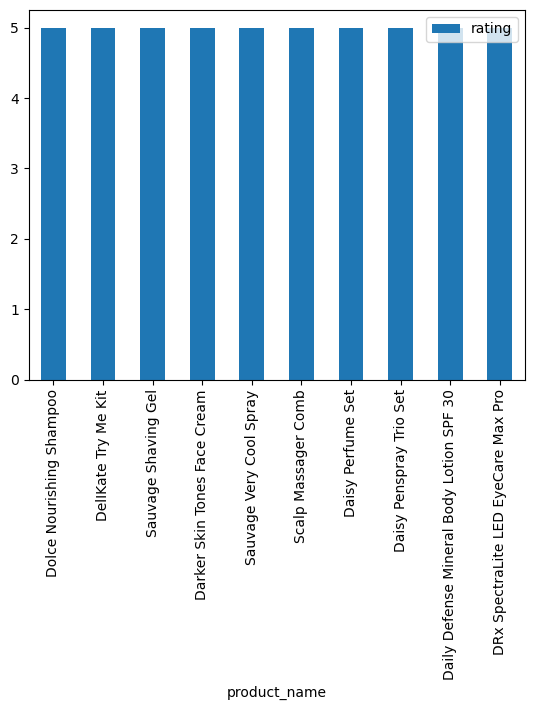

In [37]:
mean_rating_product_name.reset_index().sort_values(by='rating', ascending=False).iloc[0:10].plot(kind='bar', x='product_name', y='rating')

In [38]:
mean_rating_product_name.reset_index().sort_values(by='rating', ascending=False).iloc[0:10]

,product_name,rating
2048,Dolce Nourishing Shampoo,5.0
1911,DelIKate Try Me Kit,5.0
6637,Sauvage Shaving Gel,5.0
1869,Darker Skin Tones Face Cream,5.0
6639,Sauvage Very Cool Spray,5.0
6647,Scalp Massager Comb,5.0
1856,Daisy Perfume Set,5.0
1855,Daisy Penspray Trio Set,5.0
1819,Daily Defense Mineral Body Lotion SPF 30,5.0
1813,DRx SpectraLite LED EyeCare Max Pro,5.0


In [40]:
mean_rating_highlights = sephora_df.groupby('highlights').mean()['rating']

<AxesSubplot:xlabel='highlights'>

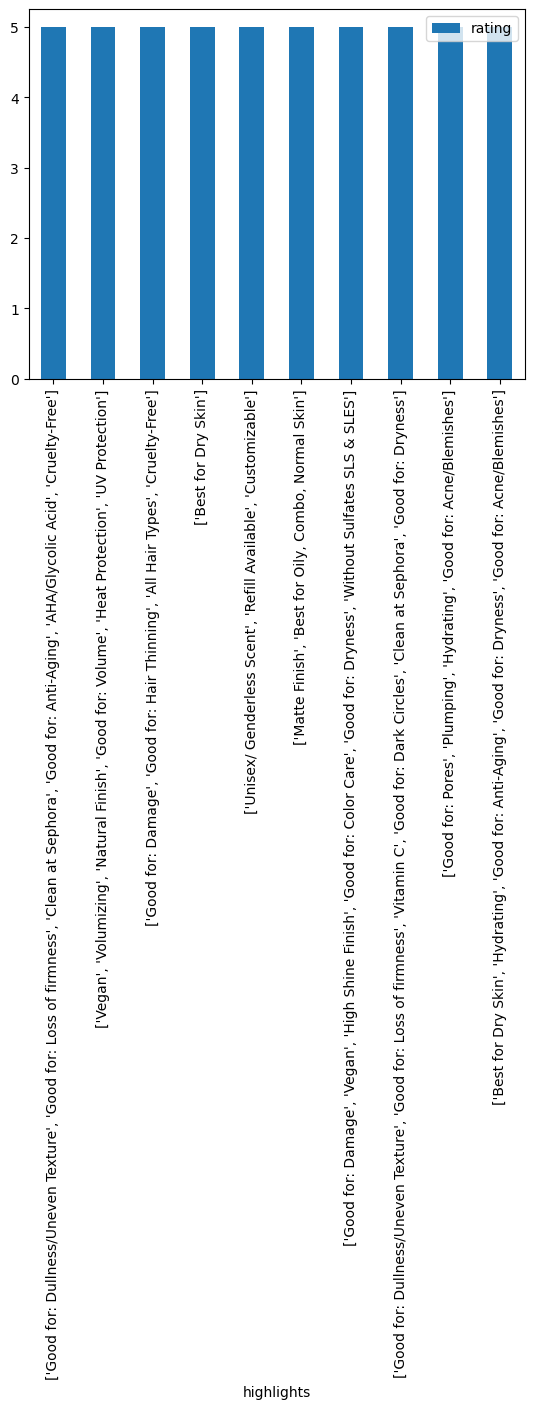

In [42]:
mean_rating_highlights.reset_index().sort_values(by='rating', ascending=False).iloc[0:10].plot(kind='bar', x='highlights', y='rating')
                    

In [43]:
mean_rating_highlights.reset_index().sort_values(by='rating', ascending=False).iloc[0:10]

,highlights,rating
1190,"['Good for: Dullness/Uneven Texture', 'Good fo...",5.0
3986,"['Vegan', 'Volumizing', 'Natural Finish', 'Goo...",5.0
861,"['Good for: Damage', 'Good for: Hair Thinning'...",5.0
93,['Best for Dry Skin'],5.0
2761,"['Unisex/ Genderless Scent', 'Refill Available...",5.0
2236,"['Matte Finish', 'Best for Oily, Combo, Normal...",5.0
959,"['Good for: Damage', 'Vegan', 'High Shine Fini...",5.0
1250,"['Good for: Dullness/Uneven Texture', 'Good fo...",5.0
1548,"['Good for: Pores', 'Plumping', 'Hydrating', '...",5.0
86,"['Best for Dry Skin', 'Hydrating', 'Good for: ...",5.0


In [45]:
sum_product_name_price_usd = sephora_df.groupby('product_name').sum()["price_usd"]

In [46]:
sum_product_name_price_usd

product_name
"B" Oil                                     11.1
"Buffet" + Copper Peptides 1%               30.9
"The Martini" Emotional Detox Bath Soak     40.0
"Ultimate Man" Body Scrub Soap              20.0
#10 Radiant Creamy Concealer Brush          26.0
                                           ...  
’REPLICA’ On A Date                        160.0
’REPLICA’ On A Date Travel Spray            35.0
’REPLICA’ On a Date Scented Candle          70.0
’REPLICA’ Sailing Day                      160.0
’REPLICA’ Sailing Day Travel Spray          35.0
Name: price_usd, Length: 8415, dtype: float64

In [ ]:
compras_gastos_df = compras_df[compras_df['SHEET'] == 'GASTOS VARIOS']

## Análisis de Texto

In [62]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [65]:
texts_product_name = ''
for row in sephora_df['highlights']: 
    texts_product_name = texts_product_name + ' ' + row
   

TypeError: can only concatenate str (not "float") to str

In [66]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'wordcloud'

In [67]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.8/160.8 kB 306.2 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [68]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

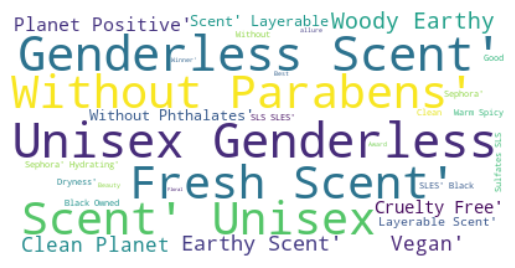

In [69]:
wc = WordCloud(background_color= 'white')
wc.generate(texts_sephora)

plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()